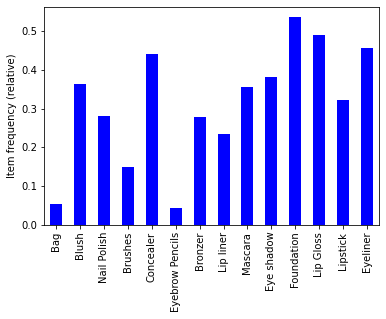

     antecedents   consequents  support  confidence      lift
6   (Eye shadow)     (Mascara)    0.321    0.842520  2.359999
7      (Mascara)  (Eye shadow)    0.321    0.899160  2.359999
4     (Eyeliner)   (Concealer)    0.297    0.649891  1.470341
5    (Concealer)    (Eyeliner)    0.297    0.671946  1.470341
0        (Blush)   (Concealer)    0.220    0.606061  1.371178
11  (Foundation)   (Lip Gloss)    0.356    0.664179  1.355468
10   (Lip Gloss)  (Foundation)    0.356    0.726531  1.355468
1      (Mascara)   (Concealer)    0.204    0.571429  1.292825
2   (Eye shadow)   (Concealer)    0.201    0.527559  1.193573
9   (Eye shadow)   (Lip Gloss)    0.201    0.527559  1.076651
8   (Eye shadow)  (Foundation)    0.211    0.553806  1.033220
3    (Concealer)  (Foundation)    0.231    0.522624  0.975046
12    (Eyeliner)  (Foundation)    0.238    0.520788  0.971619


In [8]:
import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

fp_df = pd.read_csv('Cosmetics.csv')
fp_df.set_index('Trans. ',inplace=True)
fp_df

fp_df.head()

# Support of 1-tem freq sets
itemFrequency = fp_df.sum(axis=0) / len(fp_df)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

# create frequent itemsets
itemsets = apriori(fp_df, min_support=0.2,
                   use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', 
                          min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)

rule_df = rules.sort_values(by=['lift'], ascending=False)

print(rule_df[['antecedents','consequents','support','confidence','lift']])



In [7]:
fp_df.columns

Index(['Trans. ', 'Bag', 'Blush', 'Nail Polish', 'Brushes', 'Concealer',
       'Eyebrow Pencils', 'Bronzer', 'Lip liner', 'Mascara', 'Eye shadow',
       'Foundation', 'Lip Gloss', 'Lipstick', 'Eyeliner'],
      dtype='object')